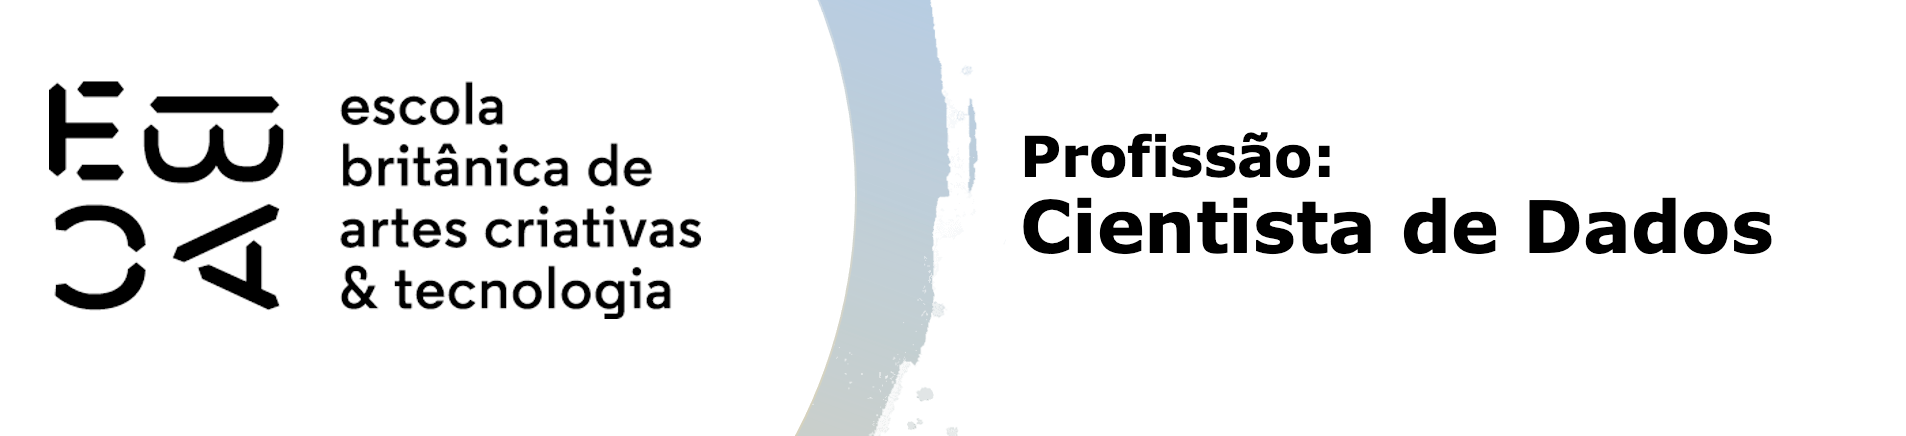

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [32]:
df = pd.read_csv('online_shoppers_intention.csv')
df.index.name='id'

In [33]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
id,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [34]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


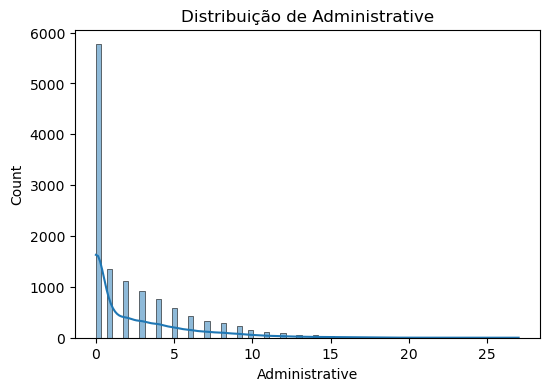

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


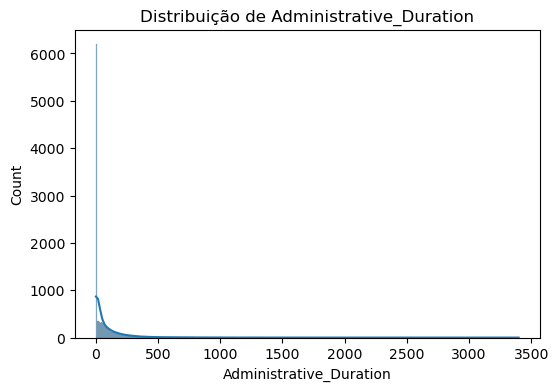

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


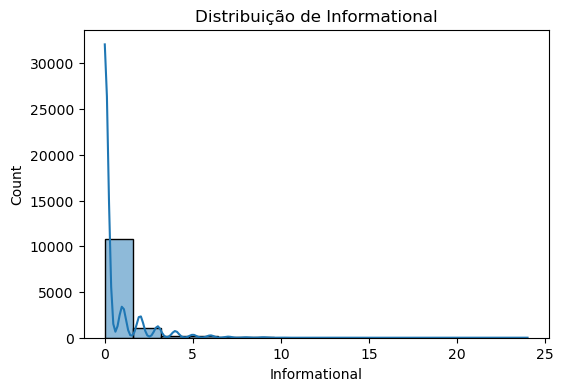

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


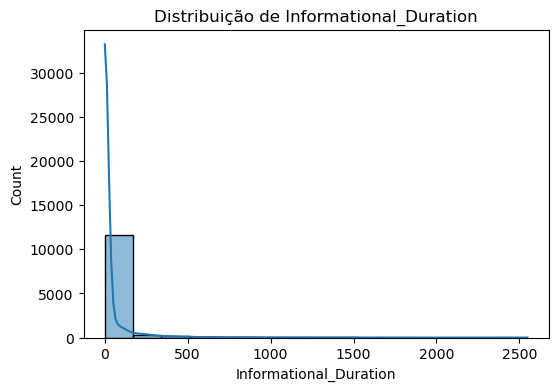

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


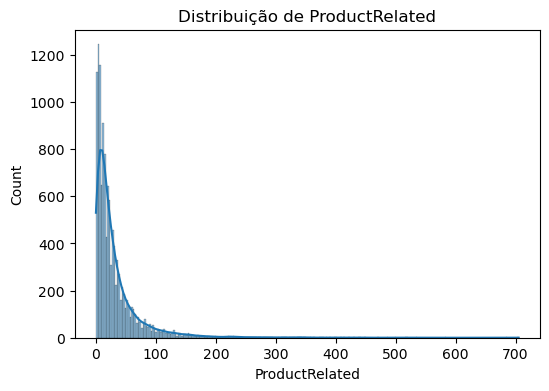

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


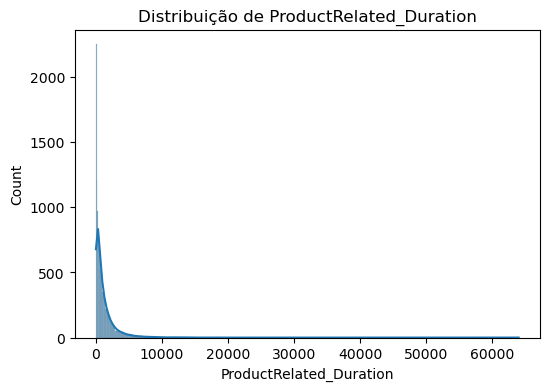

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


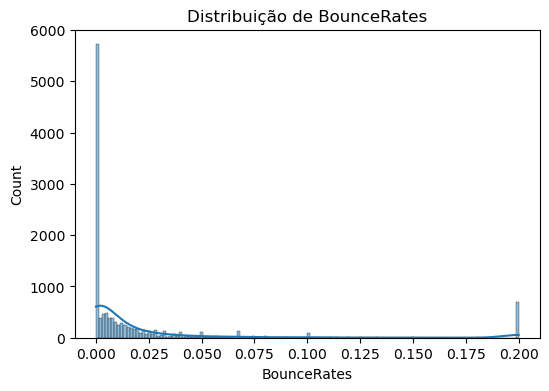

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


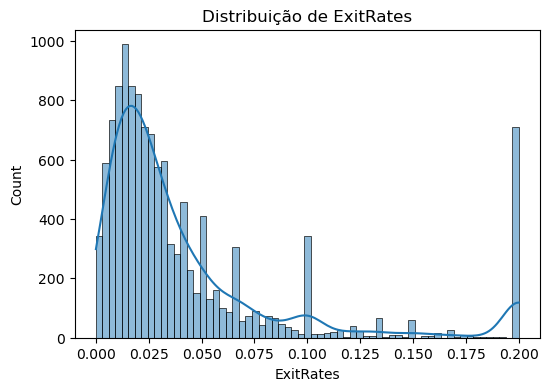

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


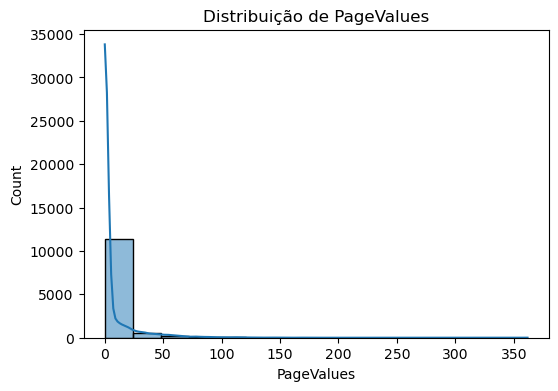

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


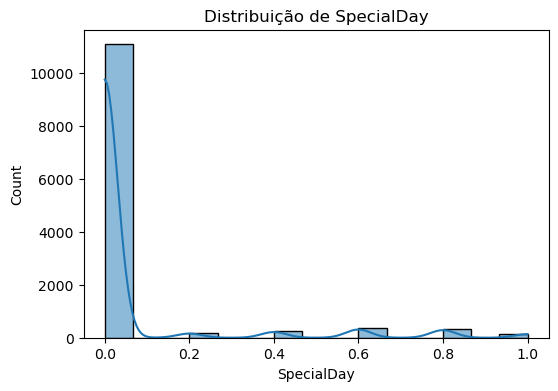

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


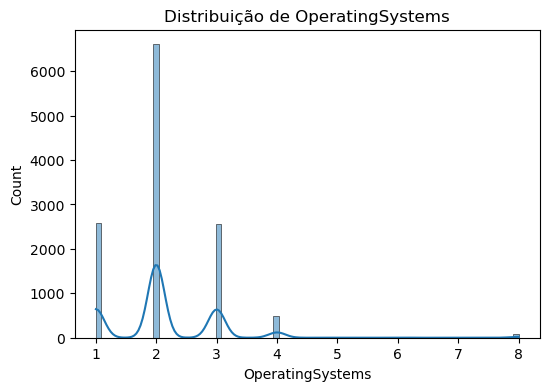

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


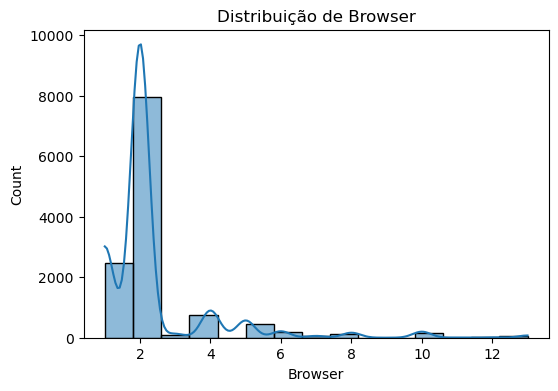

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


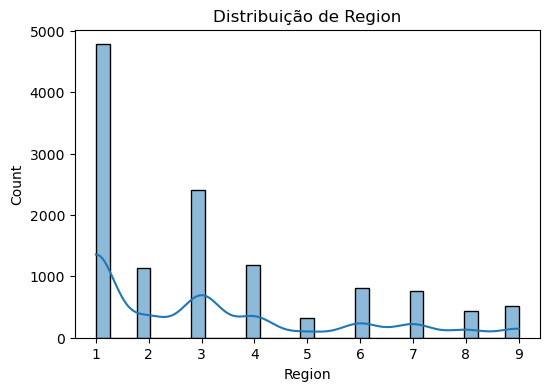

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


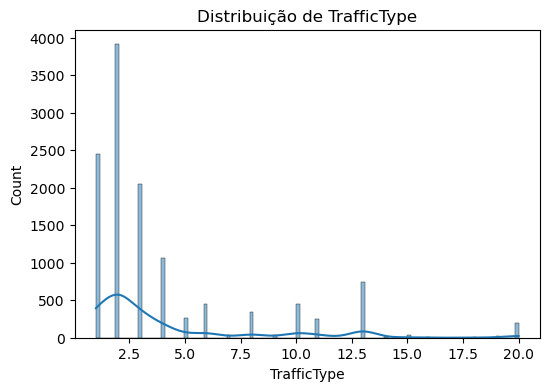

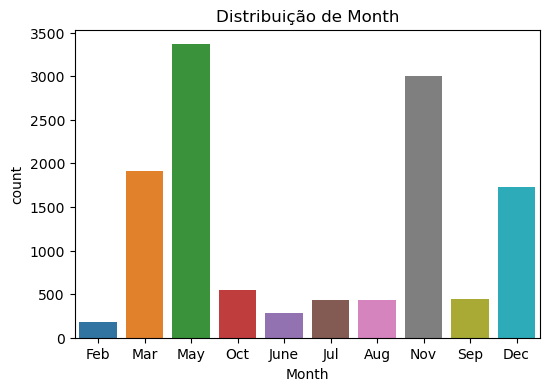

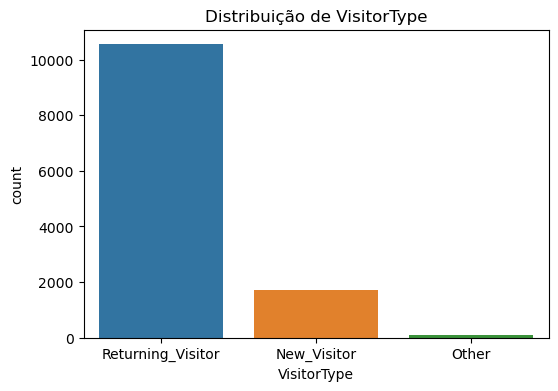

In [35]:
# Distribuição das variáveis numéricas
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

# Distribuição das variáveis qualitativas
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribuição de {col}')
    plt.show()

In [36]:
#Verificando se há valores faltantes:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [37]:
#Separando as variáveis qualitativas e numéricas:

qualitative_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['number']).columns

print("\nVariáveis qualitativas:", qualitative_vars)
print("\nVariáveis numéricas:", numerical_vars)


Variáveis qualitativas: Index(['Month', 'VisitorType'], dtype='object')

Variáveis numéricas: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


In [38]:
#Transformando as variáveis qualitativas em dummies:

df_encoded = pd.get_dummies(df, columns=qualitative_vars, drop_first=True)
print(df_encoded.info()) #exibindo pra garantir que foram transformadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

Nesta análise, NÃO vamos utilizar as variáveis: 'OperatingSystems', 'Browser', 'Region', 'TrafficType', pois são fatores secundários ao comportamento do usuário. Também excluimos Revenue que é o alvo.

In [39]:
df_encoded = df_encoded.drop(columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue'])

In [40]:
# Padronizando as variáveis:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [41]:
# Calculando a matriz de ligação usando o método de distância 'ward':
linkage_matrix = shc.linkage(df_scaled, method='ward')

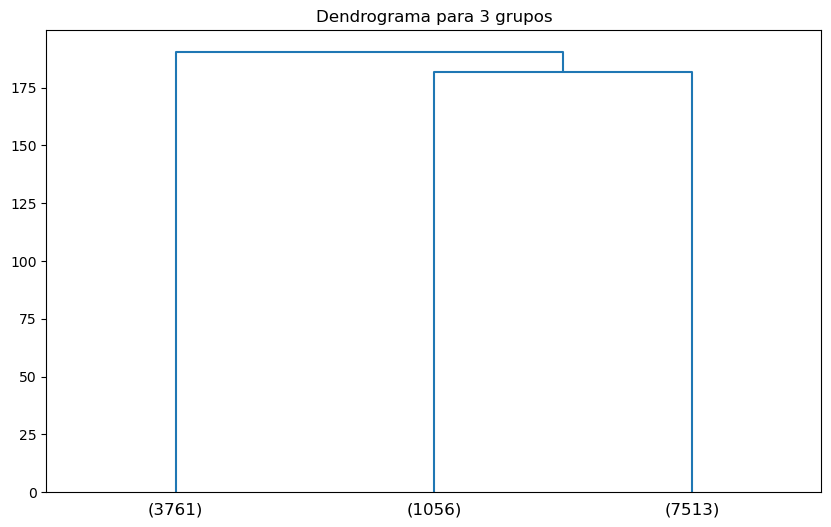

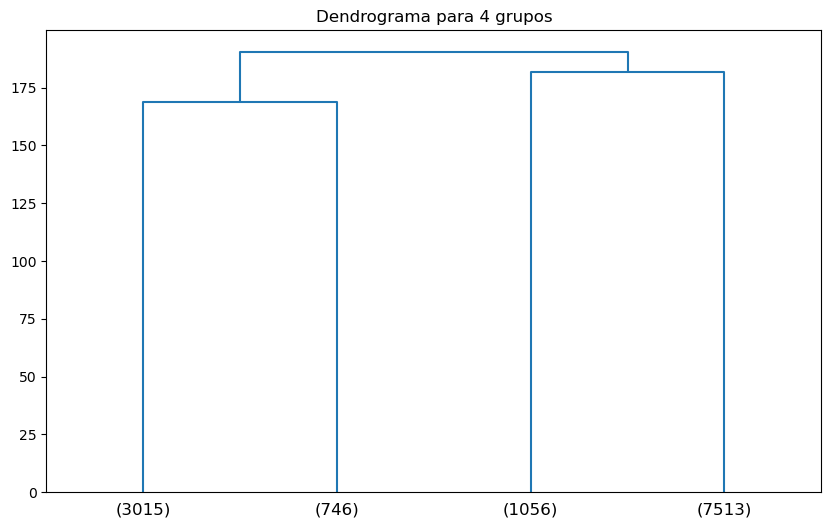

In [42]:
# Plotando o dendrograma para visualizar a estrutura dos clusters:
plt.figure(figsize=(10, 6))
plt.title("Dendrograma para 3 grupos")
dend = shc.dendrogram(linkage_matrix, truncate_mode='lastp', p=3)
plt.show()
plt.figure(figsize=(10, 6))
plt.title("Dendrograma para 4 grupos")
dend = shc.dendrogram(linkage_matrix, truncate_mode='lastp', p=4)
plt.show()

### Pelo dendrograma vemos que a divisão para 4 grupos acontece em torno de 170. Na tentativa e erro é possivel identificar que entre os valores de 166 e 168 são formados 4 grupos. Já com 169 cai para 3 grupos. O algoritmo será aplicado para 3 e 4 grupos abaixo, usando as distâncias de 169 e 166, respectivamente

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [43]:
#Corte do dendrograma para formar 3 clusters
clusters3 = shc.fcluster(linkage_matrix, t=169, criterion='distance')
# Adicionando os clusters de volta ao DataFrame
df_encoded['cluster3'] = clusters3

#Corte do dendrograma para formar 4 clusters
clusters4 = shc.fcluster(linkage_matrix, t=166, criterion='distance')
# Adicionando os clusters de volta ao DataFrame
df_encoded['cluster4'] = clusters4

In [44]:
# Contagem de elementos em cada cluster
print("\nContagem de elementos em cada cluster, para 3 clusters:")
print(df_encoded['cluster3'].value_counts())

print("\nContagem de elementos em cada cluster, para 4 clusters:")
print(df_encoded['cluster4'].value_counts())


Contagem de elementos em cada cluster, para 3 clusters:
cluster3
3    7513
1    3761
2    1056
Name: count, dtype: int64

Contagem de elementos em cada cluster, para 4 clusters:
cluster4
4    7513
1    3015
3    1056
2     746
Name: count, dtype: int64


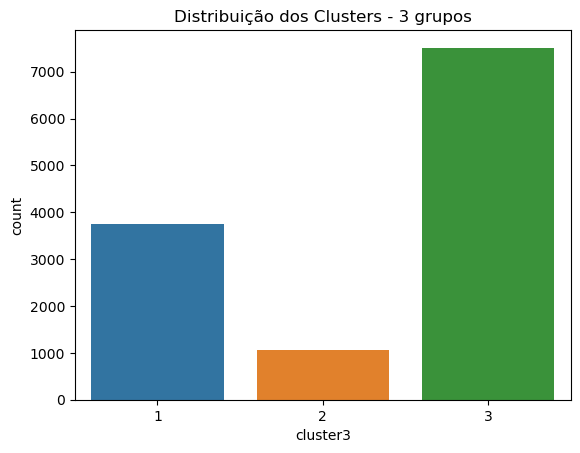

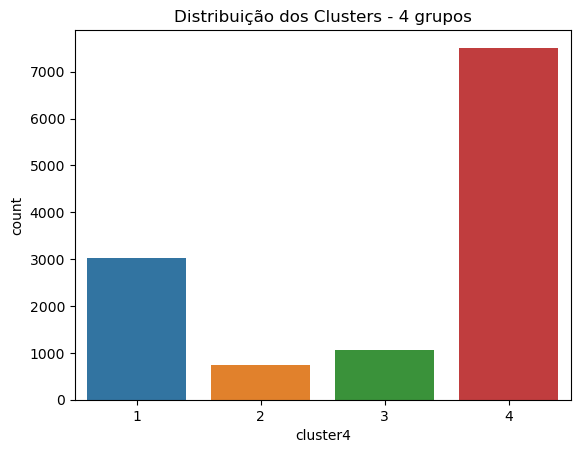

In [45]:
# Visualizar a distribuição dos clusters
sns.countplot(x='cluster3', data=df_encoded)
plt.title('Distribuição dos Clusters - 3 grupos')
plt.show()

sns.countplot(x='cluster4', data=df_encoded)
plt.title('Distribuição dos Clusters - 4 grupos')
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [46]:
df = df.merge(df_encoded[['cluster3', 'cluster4']], on='id', how='left')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster3,cluster4
id,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1,2


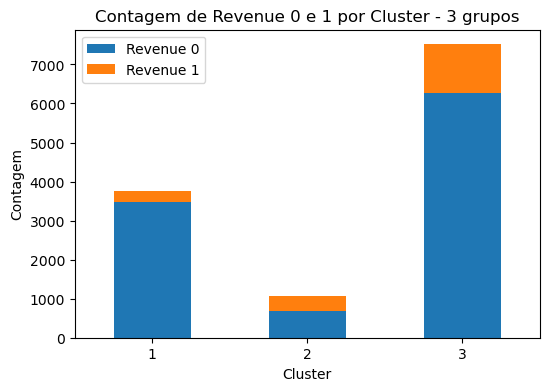

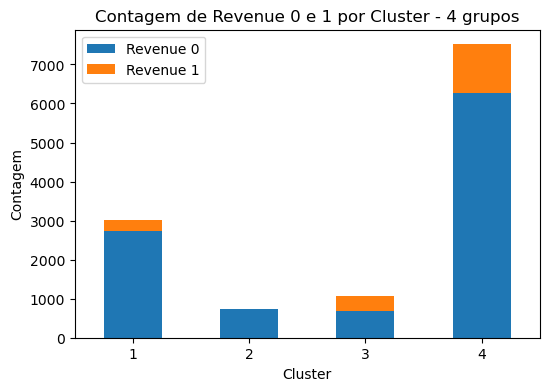

In [47]:
#Exibindo as contagens de Revenue 0 e 1:

count_revenue3 = df.groupby(['cluster3', 'Revenue']).size().unstack(fill_value=0)

# Plotar gráfico de barras empilhadas
count_revenue3.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Contagem de Revenue 0 e 1 por Cluster - 3 grupos')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(['Revenue 0', 'Revenue 1'])
plt.show()

count_revenue4 = df.groupby(['cluster4', 'Revenue']).size().unstack(fill_value=0)

count_revenue4.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Contagem de Revenue 0 e 1 por Cluster - 4 grupos')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(['Revenue 0', 'Revenue 1'])
plt.show()

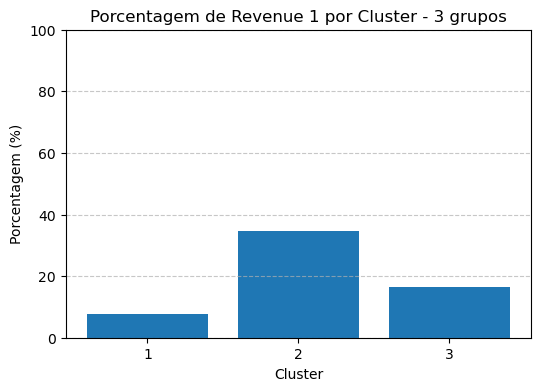

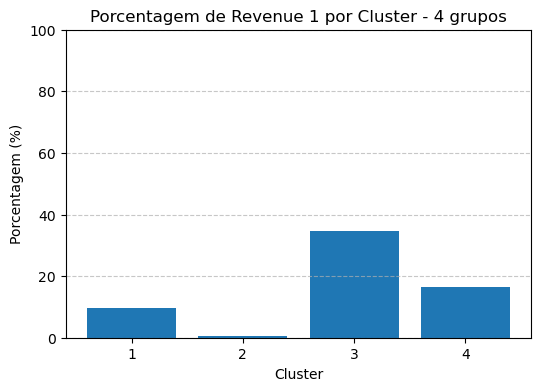

In [48]:
# Calcular a porcentagem de Revenue == True por cluster
percentage_revenue_1_3 = df.groupby('cluster3')['Revenue'].mean() * 100

# Plotar gráfico de barras para porcentagem de Revenue 1
plt.figure(figsize=(6, 4))
plt.bar(percentage_revenue_1_3.index, percentage_revenue_1_3.values)
plt.title('Porcentagem de Revenue 1 por Cluster - 3 grupos')
plt.xlabel('Cluster')
plt.ylabel('Porcentagem (%)')
plt.xticks(percentage_revenue_1_3.index)
plt.ylim(0, 100)  # Definir o limite do eixo y de 0 a 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

percentage_revenue_1_4 = df.groupby('cluster4')['Revenue'].mean() * 100

# Plotar gráfico de barras para porcentagem de Revenue 1
plt.figure(figsize=(6, 4))
plt.bar(percentage_revenue_1_4.index, percentage_revenue_1_4.values)
plt.title('Porcentagem de Revenue 1 por Cluster - 4 grupos')
plt.xlabel('Cluster')
plt.ylabel('Porcentagem (%)')
plt.xticks(percentage_revenue_1_4.index)
plt.ylim(0, 100)  # Definir o limite do eixo y de 0 a 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos ver que a divisão tanto em 3 como em 4 grupos gera retorna um Cluster com taxa de compra acima de 30%, seguido por um Cluster com sucesso um pouco abaixo de 20%, e outro um pouco abaixo de 10%. Porém na divisão em 4 grupos, temos um Cluster (2) com baixíssima taxa de compra. Isso pode ser útil para extrair insights sobre o comportamento oposto ao desejado pela página, ou seja, qual o comportamento de clientes que não realizam a compra. Por isso vamos utilizar 4 grupos na análise.

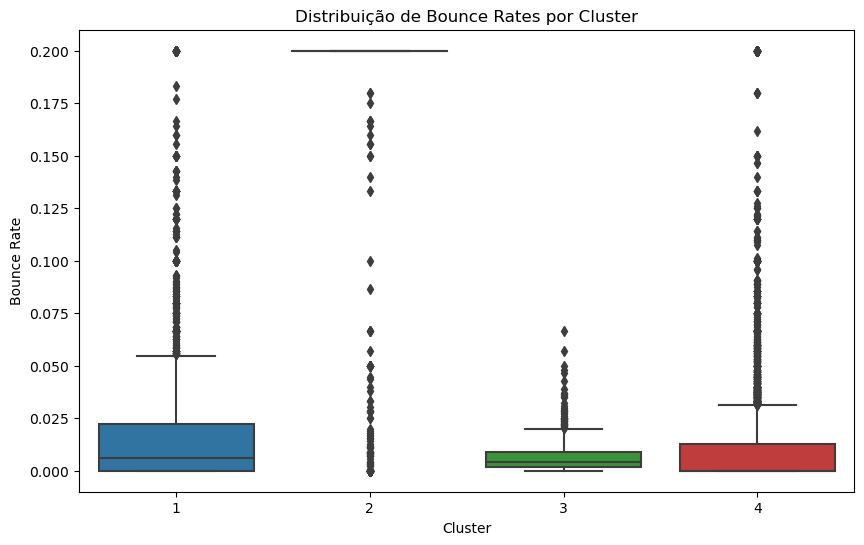

In [49]:
# Plotar boxplot de BounceRates para cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster4', y='BounceRates', data=df)
plt.title('Distribuição de Bounce Rates por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Bounce Rate')
plt.xticks(rotation=0)
plt.show()

### O Cluster 2 apresenta maior taxa de saída da página, em comparação com todos os outros. O Cluster 3 é o que de forma geral passa mais tempo navegando na página. Isso mostra que quanto mais tempo o cliente passa na página, maior a chance de realizar uma compra, e vice-versa.

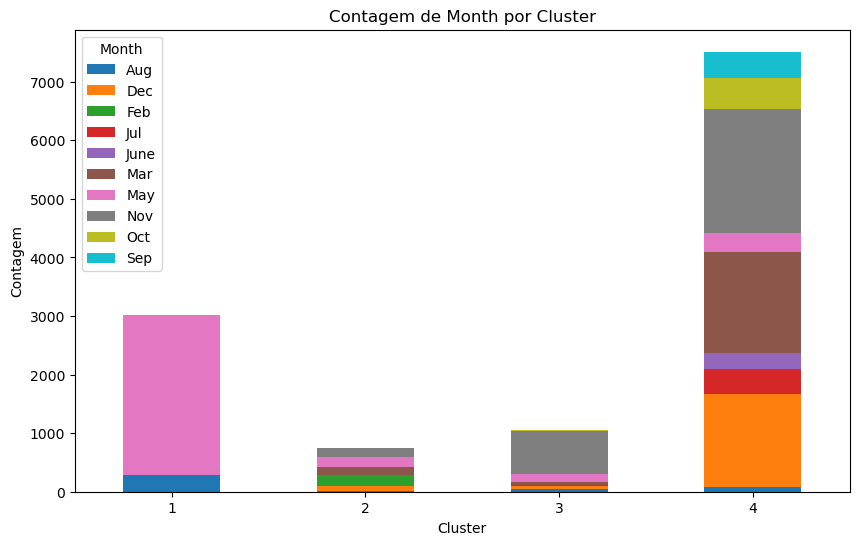

In [50]:
#Avaliação de Month por Cluster

count_month = df.groupby(['cluster4', 'Month']).size().unstack(fill_value=0)

# Plotar gráfico de barras empilhadas
count_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contagem de Month por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

### A distribuição dos meses nos clusters mostra uma grande concentração do mês de Novembro no Cluster 3, que é o que realiza mais compras. Isso possivelmente se deve ao Black Friday que ocorre nesse mês.